# UNTREF. SEÑALES Y SISTEMAS. Noviembre 2022
## Transformada y Antitransformada de Laplace


En esta asignación se le entrega una función $F(s)$ la cual debe antitransformar analíticamente, verificar su resultado comparándolo con el que ofrece Python y producir un Notebook que tenga ambas cosas. Primero debe estudiar la teoría de la Transformada de Laplace (TL), y las herramientas disponibles en Python como la librería __SYMPY__, que permiten descomponer polinomios en factores, determinar la transformada de Laplace $F(s)$ de una función $f(t)$, determinar la antitransformada de Laplace de una función $F(s)$ y simplificar el resultado analítico. En la presentación Transformada de Laplace en el Drive (páginas 29 a 34) tiene una descripción de cómo usar SYMPY. También cuenta con el formulario general del curso que tiene _Tablas de Propiedades_ y _Pares Transformados comunes_ de Laplace.

Para lograr antitransformar la $F(s)$, antes de iniciar una posible factorización, debe estudiar su estructura a fin de identificar la posible aplicación de propiedades conocidas: derivación en tiempo, derivación en s, desplazamiento en t y en s, superposición, etc. La asignación es diferente para cada grupo así que, en algunos casos, si se tendrá que factorizar $F(s)$. Puede ayudarse con las funciones que ofrece SYMPY, es decir, puede ser conveniente determinar primero el resultado de la antitransformada que ofrece SYMPY, para visualizar el camino de la demostración teórica que más le conviene. Si el resultado práctico no se parece a su resultado analítico, puede intentar graficar ambas funciones para ver si son iguales. De esta forma puede verificar si dos expresiones matemáticas distintas pueden representar la misma función. Por ejemplo $\cos(2t+A)= \cos(A)\cos(2t)-\sin(A)\sin(2t)$. En un caso se ve un coseno solamente, y en el segundo se ve una resta de coseno y seno.
La función que le corresponde es:

\begin{equation}

F(s) = \dfrac{s-2}{s(s+1)^3}
\end{equation}

# Resolución analítica

Se puede ver que $F(s)$ tiene un cero en $s=2$, un polo simple en $s=0$ y un polo triple en $s=-1$. A partir de los polos se puede determinar que la región de convergencia de $F(s)$ existe para $Re\{s\}>0$, dado que los polos no pueden caer dentro de la ROC.

\begin{equation}

F(s) = \dfrac{s-2}{s(s+1)^3} \quad \text{si} \quad Re\{s\} > 0
\end{equation}


Luego para poder encontrar la antitransformada de Laplace utilizando las tablas y propiedades, se procede a obtener las fracciones parciales con el uso de la función _apart()_ de __sympy__

In [1]:
import sympy as sp

t = sp.symbols('t')
s = sp.symbols('s')
F = (s-2)/(s*(s+1)**3)

F_partials = sp.apart(F)

Se obtiene así $F(s)$ expresada en fracciones parciales como:

In [2]:
F_partials

2/(s + 1) + 2/(s + 1)**2 + 3/(s + 1)**3 - 2/s

Por propiedad de linealidad de la transformada,

$ f(t) = \mathcal{L}\left\{\dfrac{2}{s+1} + \dfrac{2}{(s+1)^2}+ \dfrac{3}{(s+1)^3} - \dfrac{2}{s}\right\} $

$ f(t) = 2 \mathcal{L}\left\{\dfrac{1}{s+1}\right\} + 2\mathcal{L}\left\{\dfrac{1}{(s+1)^2}\right\} + 3 \mathcal{L}\left\{\dfrac{1}{(s+1)^3}\right\} - 2 \mathcal{L}\left\{ \dfrac{1}{s} \right\} $

Y de la tabla de transformadas se tiene que
\begin{equation*}
\mathcal{L}\{e^{at}u(t)\} = \dfrac{1}{s-a} 
\end{equation*}

\begin{equation*}
\mathcal{L}\{t^ne^{at}u(t)\} = \dfrac{n!}{(s-a)^{n+1}} 
\end{equation*}

\begin{equation*}
\mathcal{L}\{u(t)\} = \dfrac{1}{s} 
\end{equation*}

Por lo cual queda:

$f(t) = 2 e^{-t}u(t) + 2 te^{-t}u(t) + \mathcal{L}\left\{\dfrac{3}{(s+1)^3}\right\} -2 u(t)$

Para poder resolver la antitransformada que quedó, para $t^3e^{-t}u(t)$ su transformada será,

\begin{equation*}
\mathcal{L}\{ t^2e^{-t}u(t) \} = \dfrac{2!}{(s+1)^3}
\end{equation*}

Por lo cual multiplicando ambos miebros por $3/2!$

\begin{equation*}
\dfrac{3}{2!}\mathcal{L}\{ t^2e^{-t}u(t) \} = \dfrac{3}{2!}\dfrac{2!}{(s+1)^3}
\end{equation*}

Se obtiene la transformada buscada

\begin{equation*}
\mathcal{L}\left\{\dfrac{3}{2!} t^2e^{-t}u(t)\right \} = \dfrac{3}{(s+1)^3}
\end{equation*}

\begin{equation*}
\mathcal{L}\left\{\dfrac{3}{2} t^2e^{-t}u(t)\right \} = \dfrac{3}{(s+1)^3}
\end{equation*}



Así:

$\mathcal{L}^{-1}\left\{F(s)\right\} = f(t) = 2 e^{-t}u(t) + 2 te^{-t}u(t) + \dfrac{3}{2}t^2e^{-t}u(t) -2 u(t) $ 

\begin{equation*}
f(t) = \dfrac{u(t)}{2}\left( 4 e^{-t} + 4te^{-t} + 3t^2e^{-t} - 4 \right)
\end{equation*}

# Resolución con SymPy

Mediante la función *inverse_laplace_transform()* de __sympy__ se encuentra de forma sencilla la expresión de $f(t)$

In [3]:
f_sympy = sp.inverse_laplace_transform(F, s, t).simplify()
f_sympy

(3*t**2 + 4*t - 4*exp(t) + 4)*exp(-t)*Heaviside(t)/2

donde $\theta(t)$ expresa la función escalon $u(t)$ o Heaviside

Para comprobar que la expresión obtenida por __sympy__ y la obtenida de forma analítica coinciden, se grafican ambas

In [4]:
f_analityc = (sp.Heaviside(t)/2)*(4*sp.exp(-t)+4*t*sp.exp(-t)+3*t**2*sp.exp(-t)-4)

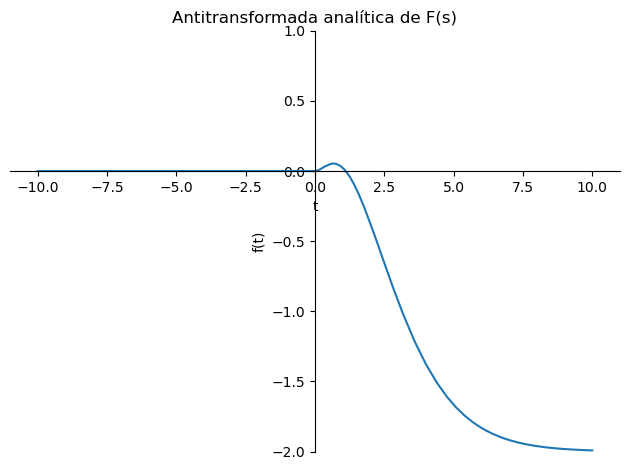

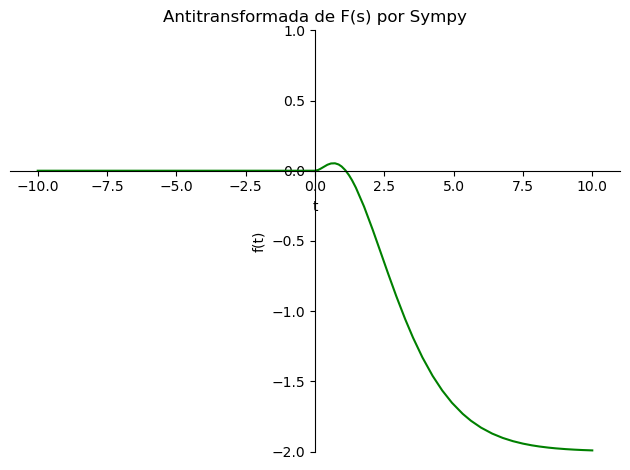

In [7]:
plot1 = sp.plotting.plot(f_analityc, title='Antitransformada analítica de F(s)', ylim=(-2,1))
plot2 = sp.plotting.plot(f_sympy, title='Antitransformada de F(s) por Sympy', ylim=(-2,1), line_color='green')

Ambas expresiones son iguales.